<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/105/keras_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/keras-networks/keras-networks.zip
!unzip -qq keras-networks.zip
%cd keras-networks

--2023-02-24 08:41:54--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/keras-networks/keras-networks.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.240.242, 52.218.201.177, 52.92.176.122, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.240.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2340031 (2.2M) [binary/octet-stream]
Saving to: ‘keras-networks.zip’

keras-networks.zip  100%[===================>]   2.23M  4.45MB/s    in 0.5s    

2023-02-24 08:41:55 (4.45 MB/s) - ‘keras-networks.zip’ saved [2340031/2340031]

/content/keras-networks


In [64]:
from tensorflow.keras.applications import (
    ResNet50, InceptionV3, Xception, VGG16, VGG19, imagenet_utils)
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plt_imshow(title, image):
    # display the image
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [79]:
args = {
    "image": "images/bmw.png",
    "model": "inception"
}

In [48]:
# dictionary of model names to Keras classes
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception,
    "resnet": ResNet50
}

if args["model"] not in MODELS.keys():
    raise AssertionError("--model arg must be a valid key in MODELs dict!")

In [80]:
# init input shape
input_shape = (224, 224)
# init preprocessing function
preprocess = imagenet_utils.preprocess_input

# if we are using InceptionV3 or Xception,
# input shape must be set to (299x299) instead of (224x224)
# and use a different preprocessing function
if args["model"] in ("inception", "xception"):
    input_shape = (299, 299)
    preprocess = preprocess_input

In [81]:
# load network weights (may need to be downloaded)
print(f"[INFO] loading {args['model']}...")
Network = MODELS[args["model"]]
model = Network(weights="imagenet")

[INFO] loading inception...


In [82]:
# load input image using Keras helper utility
# ensure it is resized to input_shape
print("[INFO] loading and preprocessing input image...")
image = load_img(args["image"], target_size=input_shape)
image = img_to_array(image)

# image is now represented as a numpy array of 
# size (input_shape[0], input_shape[1], 3)
# however we must expand it to (1, input_shape[0], input_shape[1], 3)
# so it can pass through the network
image = np.expand_dims(image, axis=0)

# preprocess the image using appropriate function based on model
# could be mean subtraction, scaling etc.
image = preprocess(image)

[INFO] loading and preprocessing input image...


In [83]:
# classify the image
print(f"[INFO] classifying image with {args['model']}...")
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds, top=5)

# loop over predictions and display rank-5 predictions + probabilities
for (i, (imagenet_id, label, prob)) in enumerate(P[0]):
    print(f"{i + 1}. {label}: {prob * 100:.2f}%")

[INFO] classifying image with inception...
1/1 [==============================] - 2s 2s/step
1. convertible: 94.07%
2. sports_car: 1.09%
3. amphibian: 0.18%
4. space_bar: 0.12%
5. car_wheel: 0.05%


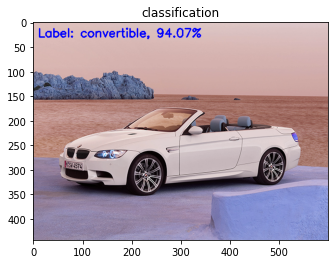

In [84]:
# load image using opencv
orig = cv2.imread(args["image"])
orig = imutils.resize(orig, width=600)
# get top prediction
(imagenet_id, label, prob) = P[0][0]
# display image with text
cv2.putText(
    orig,
    text=f"Label: {label}, {prob * 100:.2f}%",
    org=(10, 30),
    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
    fontScale=0.8,
    color=(0, 0, 255),
    thickness=2
)
plt_imshow("classification", orig)